<a href="https://colab.research.google.com/github/raagav456/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#Preprocessing the Data

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

tokenized_tweets = []

for i in range(0, len(df['tweet'])) :
  review = re.sub("@[\w]*", ' ', df['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  tokenized_tweets.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df['clean_tweet'] = tokenized_tweets

In [6]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


##Creating the Bag of Words Model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(tokenized_tweets).toarray()
y = df.iloc[:, 1].values

#Exploratory Data Analysis

##Visualize the frequency of words

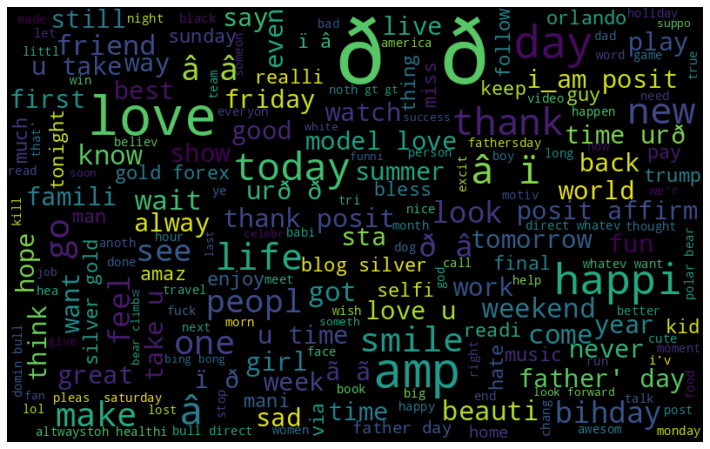

In [8]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Visualizing +ve words

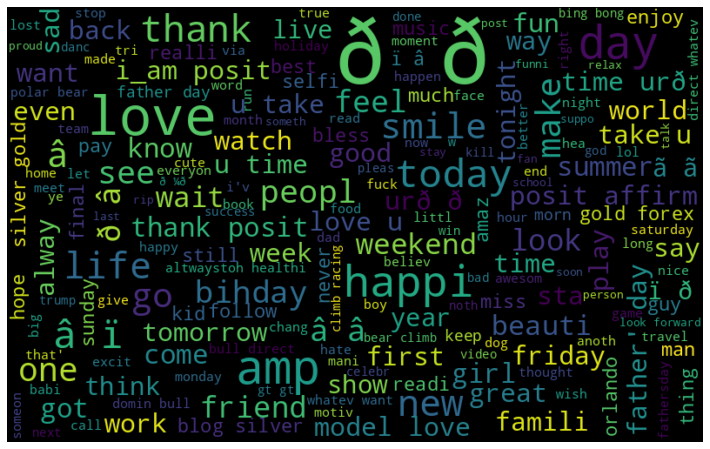

In [9]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Visualizing -ve words

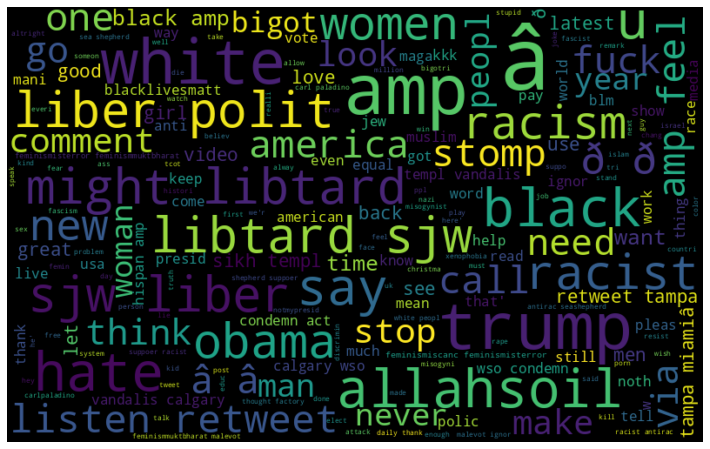

In [10]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Classifying the Tweets as Positive and Negative

##Extract the HashTags

In [11]:
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

##Positive HashTags

In [12]:
# Extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])

# Unnest list (Exploding the list into rows)
ht_positive = sum(ht_positive, [])

# Creating frequency distribution of poitive hashtags
freq = nltk.FreqDist(ht_positive)

# Creating dataframe of that distibution
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


###Select Top 10 HashTags from positive

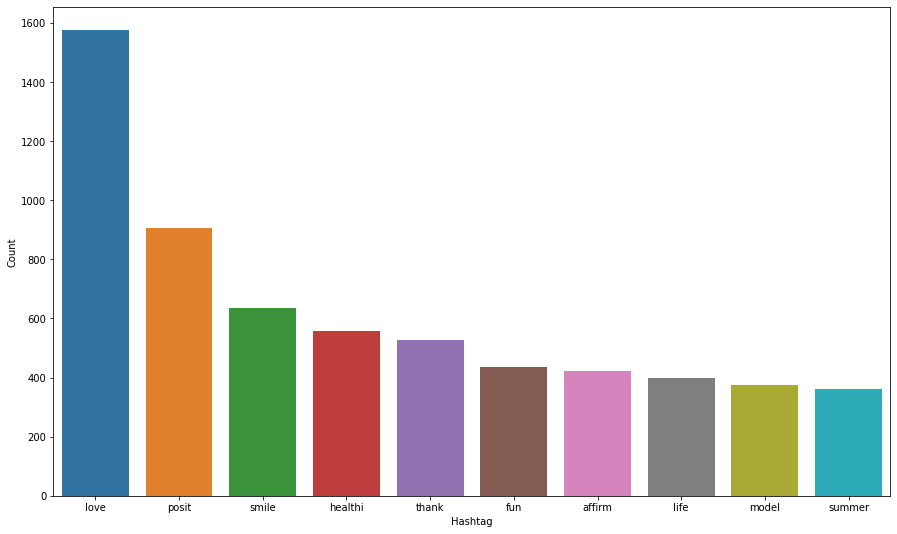

In [13]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

##Negative HashTags

In [14]:
# Extract hashtags from non-racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label'] == 1])

# Unnest list (Exploding the list into rows)
ht_negative = sum(ht_negative, [])

# Creating frequency distribution of poitive hashtags
freq = nltk.FreqDist(ht_negative)

# Creating dataframe of that distibution
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


###Select Top 10 HashTags from negative

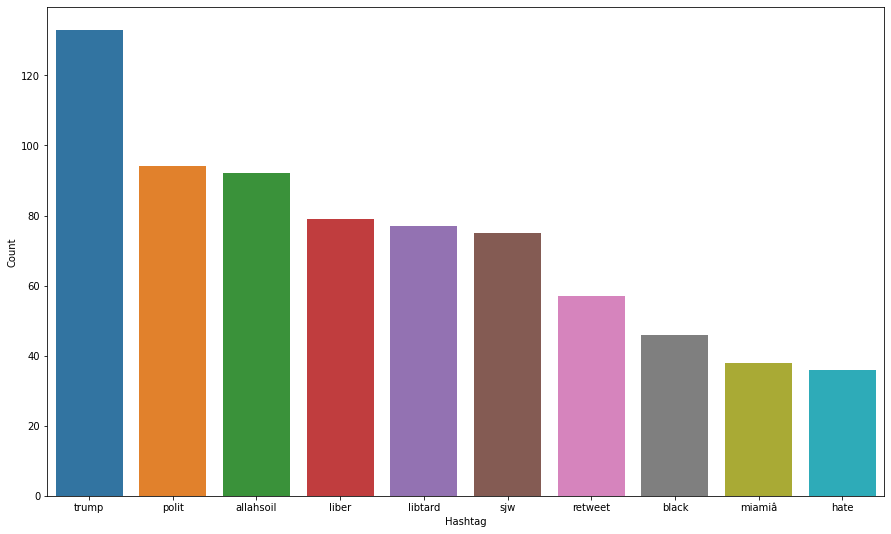

In [15]:
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.show()

#Splitting the Dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training the Decision Tree model on the Training set

In [17]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

#Predicting the Model

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


## Making the Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix for Validation results')

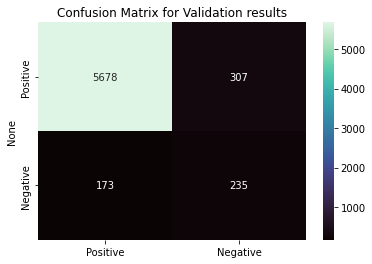

In [19]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns= ['Positive', 'Negative'], index= [['Positive', 'Negative']])
ax = plt.axes()
sns.heatmap(cm, annot= True, fmt='g', cmap= 'mako')
ax.set_title("Confusion Matrix for Validation results")

## Calculating the accuracy

In [20]:
from sklearn.metrics import f1_score

print("Training Accuracy   :", classifier.score(X_train, y_train))
print("Validation Accuracy :", classifier.score(X_test, y_test))
print("F1 score            :", f1_score(y_test, y_pred))

Training Accuracy   : 0.9972231999687121
Validation Accuracy : 0.9249178789300798
F1 score            : 0.49473684210526314


#Visualizing the Tweets

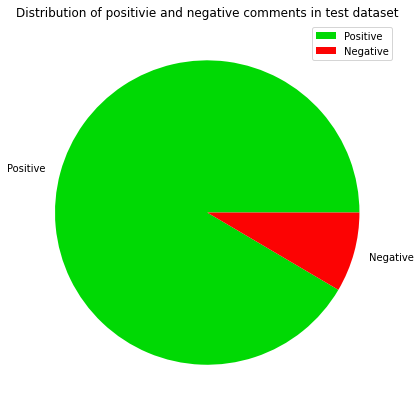

In [30]:
data = [len(y_pred) - np.sum(y_pred), np.sum(y_pred)]
labels = ['Positive', 'Negative']
colors = ['#00d904', '#fc0303',]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels, colors= colors)
plt.title("Distribution of positivie and negative comments in test dataset")
plt.legend()
plt.show()